In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train Spaceship Titanic.csv')

DataFrame description.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [4]:
train.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


We can use seaborn to create a simple heatmap to see where we are missing data.

<AxesSubplot: >

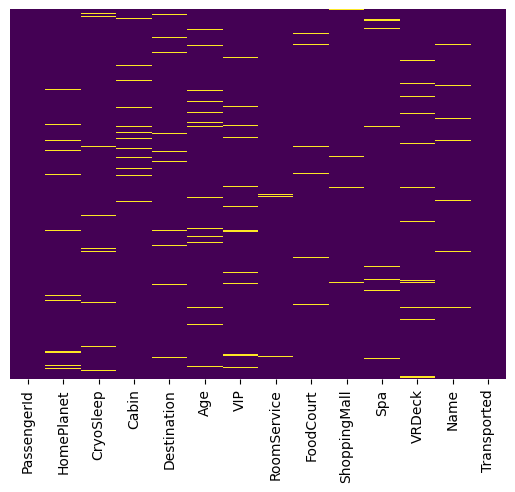

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train.duplicated().sum()

0

It seems that we don't have columns with too much missing date.

Let's make same exploratory data analysis.

<AxesSubplot: xlabel='Transported', ylabel='count'>

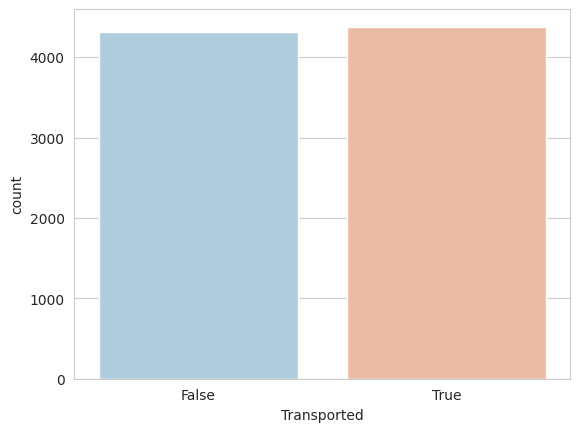

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',data=train,palette='RdBu_r')

<AxesSubplot: xlabel='VIP', ylabel='count'>

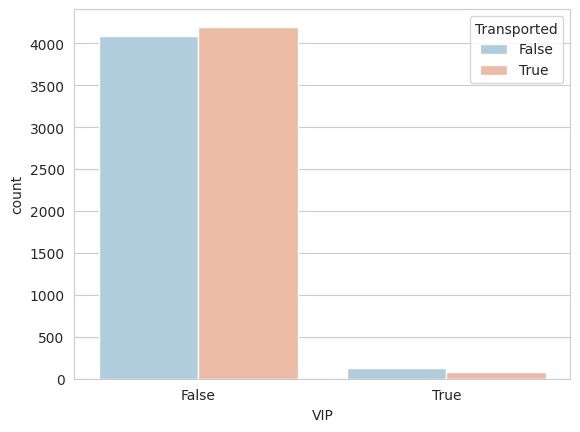

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='VIP',hue='Transported',data=train,palette='RdBu_r')

<AxesSubplot: xlabel='CryoSleep', ylabel='count'>

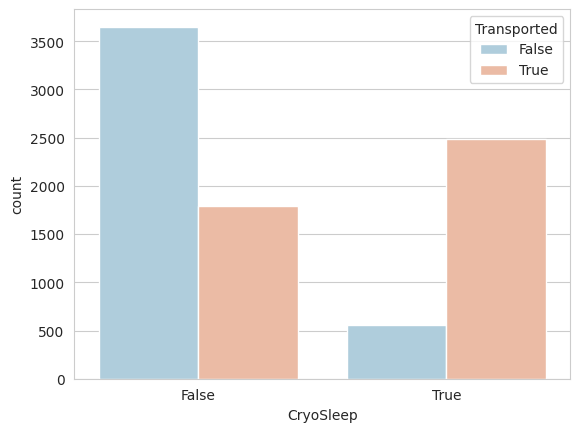

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='CryoSleep',hue='Transported',data=train,palette='RdBu_r')

We don't see that the target column depands on whether the passenger has paid for VIP service or not, but it seems that column CryoSleep is pretty important.

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

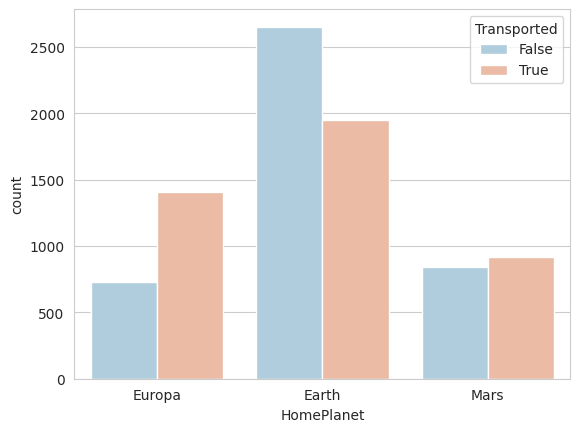

In [13]:
sns.countplot(x='HomePlanet',hue='Transported',data=train,palette='RdBu_r')

Since passengers are trevelling in groups we can fill some of the missing data in HomePlanet and Cabin based on the information of their fellow travellers.

In [14]:
train[train['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [15]:
train.at [8613, 'HomePlanet'] = 'Europa'
train.at [8489, 'HomePlanet'] = 'Mars'
train.at [8454, 'HomePlanet'] = 'Earth'
train.at [8383, 'HomePlanet'] = 'Earth'
train.at [8353, 'HomePlanet'] = 'Mars'
train.at [8295, 'HomePlanet'] = 'Mars'
train.at [8251, 'HomePlanet'] = 'Europa'
train.at [8077, 'HomePlanet'] = 'Mars'
train.at [7798, 'HomePlanet'] = 'Europa'
train.at [7786, 'HomePlanet'] = 'Europa'
train.at [7682, 'HomePlanet'] = 'Europa'
train.at [7434, 'HomePlanet'] = 'Earth'
train.at [7363, 'HomePlanet'] = 'Earth'
train.at [7339, 'HomePlanet'] = 'Mars'
train.at [7316, 'HomePlanet'] = 'Earth'
train.at [7286, 'HomePlanet'] = 'Mars'
train.at [7211, 'HomePlanet'] = 'Earth'
train.at [7116, 'HomePlanet'] = 'Europa'
train.at [6854, 'HomePlanet'] = 'Mars'
train.at [6735, 'HomePlanet'] = 'Europa'
train.at [6629, 'HomePlanet'] = 'Earth'
train.at [6591, 'HomePlanet'] = 'Mars'
train.at [6450, 'HomePlanet'] = 'Mars'
train.at [6267, 'HomePlanet'] = 'Europa'
train.at [6205, 'HomePlanet'] = 'Europa'
train.at [6169, 'HomePlanet'] = 'Europa'
train.at [6154, 'HomePlanet'] = 'Europa'
train.at [6056, 'HomePlanet'] = 'Earth'
train.at [6054, 'HomePlanet'] = 'Earth'
train.at [6011, 'HomePlanet'] = 'Earth'
train.at [5953, 'HomePlanet'] = 'Europa'
train.at [5906, 'HomePlanet'] = 'Europa'
train.at [5904, 'HomePlanet'] = 'Mars'
train.at [5699, 'HomePlanet'] = 'Europa'
train.at [5689, 'HomePlanet'] = 'Earth'
train.at [5624, 'HomePlanet'] = 'Mars'
train.at [5438, 'HomePlanet'] = 'Earth'
train.at [5316, 'HomePlanet'] = 'Europa'
train.at [5112, 'HomePlanet'] = 'Mars'
train.at [5081, 'HomePlanet'] = 'Mars'
train.at [5079, 'HomePlanet'] = 'Mars'
train.at [5024, 'HomePlanet'] = 'Europa'
train.at [4770, 'HomePlanet'] = 'Earth'
train.at [4702, 'HomePlanet'] = 'Mars'
train.at [4632, 'HomePlanet'] = 'Mars'
train.at [4535, 'HomePlanet'] = 'Mars'
train.at [4374, 'HomePlanet'] = 'Europa'
train.at [4343, 'HomePlanet'] = 'Europa'
train.at [4097, 'HomePlanet'] = 'Europa'
train.at [3940, 'HomePlanet'] = 'Europa'
train.at [3433, 'HomePlanet'] = 'Mars'
train.at [3277, 'HomePlanet'] = 'Earth'
train.at [3192, 'HomePlanet'] = 'Europa'
train.at [3119, 'HomePlanet'] = 'Mars'
train.at [2898, 'HomePlanet'] = 'Earth'
train.at [2617, 'HomePlanet'] = 'Earth'
train.at [2638, 'HomePlanet'] = 'Earth'
train.at [2642, 'HomePlanet'] = 'Earth'
train.at [2544, 'HomePlanet'] = 'Earth'
train.at [2425, 'HomePlanet'] = 'Mars'
train.at [2322, 'HomePlanet'] = 'Earth'
train.at [2324, 'HomePlanet'] = 'Europa'
train.at [2227, 'HomePlanet'] = 'Earth'
train.at [2246, 'HomePlanet'] = 'Europa'
train.at [1916, 'HomePlanet'] = 'Earth'
train.at [1892, 'HomePlanet'] = 'Earth'
train.at [1757, 'HomePlanet'] = 'Earth'
train.at [1024, 'HomePlanet'] = 'Europa'
train.at [999, 'HomePlanet'] = 'Europa'
train.at [993, 'HomePlanet'] = 'Mars'
train.at [962, 'HomePlanet'] = 'Earth'
train.at [920, 'HomePlanet'] = 'Earth'
train.at [848, 'HomePlanet'] = 'Mars'
train.at [737, 'HomePlanet'] = 'Europa'
train.at [637, 'HomePlanet'] = 'Mars'
train.at [568, 'HomePlanet'] = 'Earth'
train.at [524, 'HomePlanet'] = 'Earth'
train.at [505, 'HomePlanet'] = 'Mars'
train.at [501, 'HomePlanet'] = 'Europa'
train.at [471, 'HomePlanet'] = 'Europa'
train.at [407, 'HomePlanet'] = 'Earth'
train.at [405, 'HomePlanet'] = 'Mars'
train.at [186, 'HomePlanet'] = 'Mars'
train.at [113, 'HomePlanet'] = 'Europa'
train.at [59, 'HomePlanet'] = 'Mars'

In [16]:
train[train['Cabin'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False


In [17]:
train.at [103, 'Cabin'] = 'B/5/P'
train.at [103, 'Cabin'] = 'D/12/P'
train.at [251, 'Cabin'] = 'G/45/P'

In [18]:
train['HomePlanet'] = train['HomePlanet'].fillna('Unknown')

In [19]:
train['CryoSleep'] = train['CryoSleep'].fillna('Unknown')

In [20]:
train['Destination'] = train['Destination'].fillna('Unknown')
train['Cabin'] = train['Cabin'].fillna('Unknown')

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

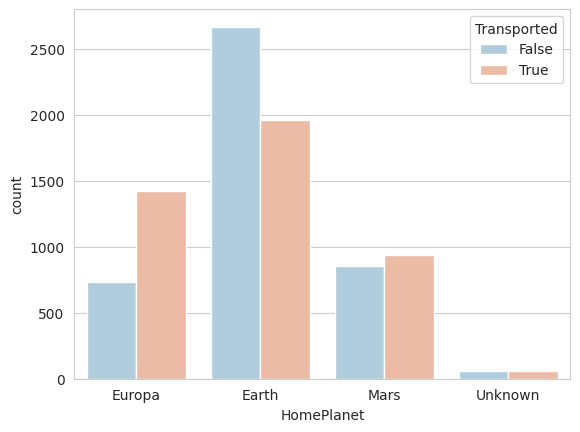

In [21]:
sns.countplot(x='HomePlanet',hue='Transported',data=train,palette='RdBu_r')

<AxesSubplot: xlabel='Destination', ylabel='count'>

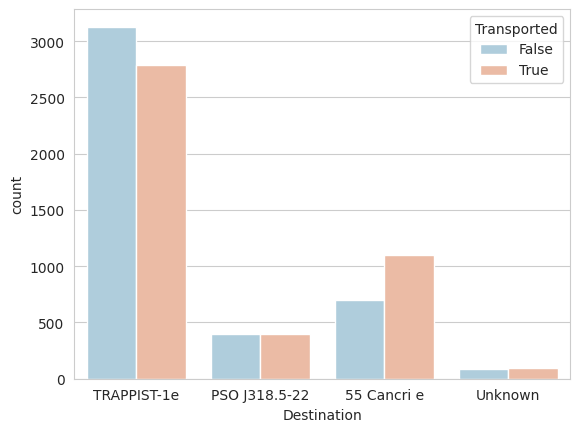

In [22]:
sns.countplot(x='Destination',hue='Transported',data=train,palette='RdBu_r')

In [23]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

<AxesSubplot: >

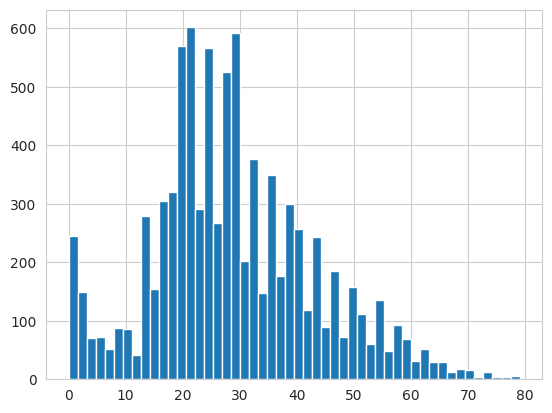

In [24]:
train['Age'].hist(bins=50)

Let's create a new column and devide our passengers into groups according their age.

In [25]:
def age_group(train):
    age_group = [
        (train['Age'] < 1),
        (train['Age'] < 10),
        (train['Age'] < 18),
        (train['Age'] < 55),
        (train['Age'] >= 55)
        ]
    age_group_name = ['Toddler','Child', 'Teenager','Adult','Senior']
    train['age_group'] = np.select(age_group, age_group_name, default='unknown')
    
    return train

train = age_group(train)


In [26]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,age_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Senior
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teenager


In [27]:
train['VIP'] = train['VIP'].fillna('Unknown')
train['RoomService'] = train['RoomService'].fillna('Unknown')
train['FoodCourt'] = train['FoodCourt'].fillna('Unknown')
train['ShoppingMall'] = train['ShoppingMall'].fillna('Unknown')
train['Spa'] = train['Spa'].fillna('Unknown')
train['VRDeck'] = train['VRDeck'].fillna('Unknown')

In [28]:
train.drop(['Name','PassengerId'], axis=1,inplace=True)

In [29]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,age_group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Adult
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Adult
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Senior
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Adult
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Teenager


In [30]:
train['homeplanet_code'] = train['HomePlanet'].astype('category').cat.codes
train['CryoSleep_code'] = train['CryoSleep'].astype('category').cat.codes
train['VIP_code'] = train['VIP'].astype('category').cat.codes
train['Destination_code'] = train['Destination'].astype('category').cat.codes
train['age_group_code'] = train['age_group'].astype('category').cat.codes


In [31]:
train['RoomService_code'] = train['RoomService'].astype('category').cat.codes
train['FoodCourt_code'] = train['FoodCourt'].astype('category').cat.codes
train['ShoppingMall_code'] = train['ShoppingMall'].astype('category').cat.codes
train['Spa_code'] = train['Spa'].astype('category').cat.codes
train['VRDeck_code'] = train['VRDeck'].astype('category').cat.codes

In [32]:
train.drop(['HomePlanet','CryoSleep','Destination','Age', 'VIP', 'age_group','Cabin'], axis=1,inplace=True)

In [33]:
train.drop(['RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck'], axis=1,inplace=True)

In [34]:
train.head()

,Transported,homeplanet_code,CryoSleep_code,VIP_code,Destination_code,age_group_code,RoomService_code,FoodCourt_code,ShoppingMall_code,Spa_code,VRDeck_code
0,False,1,0,0,2,0,0,0,0,0,0
1,True,0,0,0,2,0,109,9,25,456,44
2,False,1,0,1,2,2,43,1206,0,1273,49
3,False,1,0,0,2,0,0,806,332,1132,187
4,True,0,0,0,2,3,277,69,149,470,2


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Transported        8693 non-null   bool 
 1   homeplanet_code    8693 non-null   int8 
 2   CryoSleep_code     8693 non-null   int8 
 3   VIP_code           8693 non-null   int8 
 4   Destination_code   8693 non-null   int8 
 5   age_group_code     8693 non-null   int8 
 6   RoomService_code   8693 non-null   int16
 7   FoodCourt_code     8693 non-null   int16
 8   ShoppingMall_code  8693 non-null   int16
 9   Spa_code           8693 non-null   int16
 10  VRDeck_code        8693 non-null   int16
dtypes: bool(1), int16(5), int8(5)
memory usage: 136.0 KB


<AxesSubplot: >

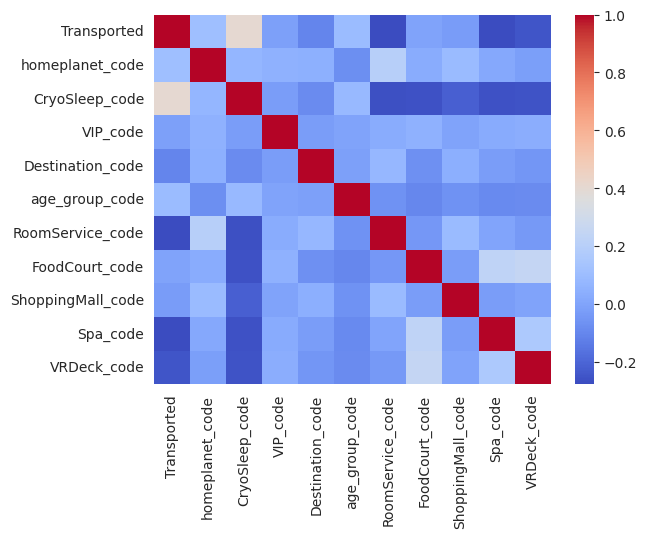

In [36]:
sns.heatmap(train.corr(),cmap='coolwarm')

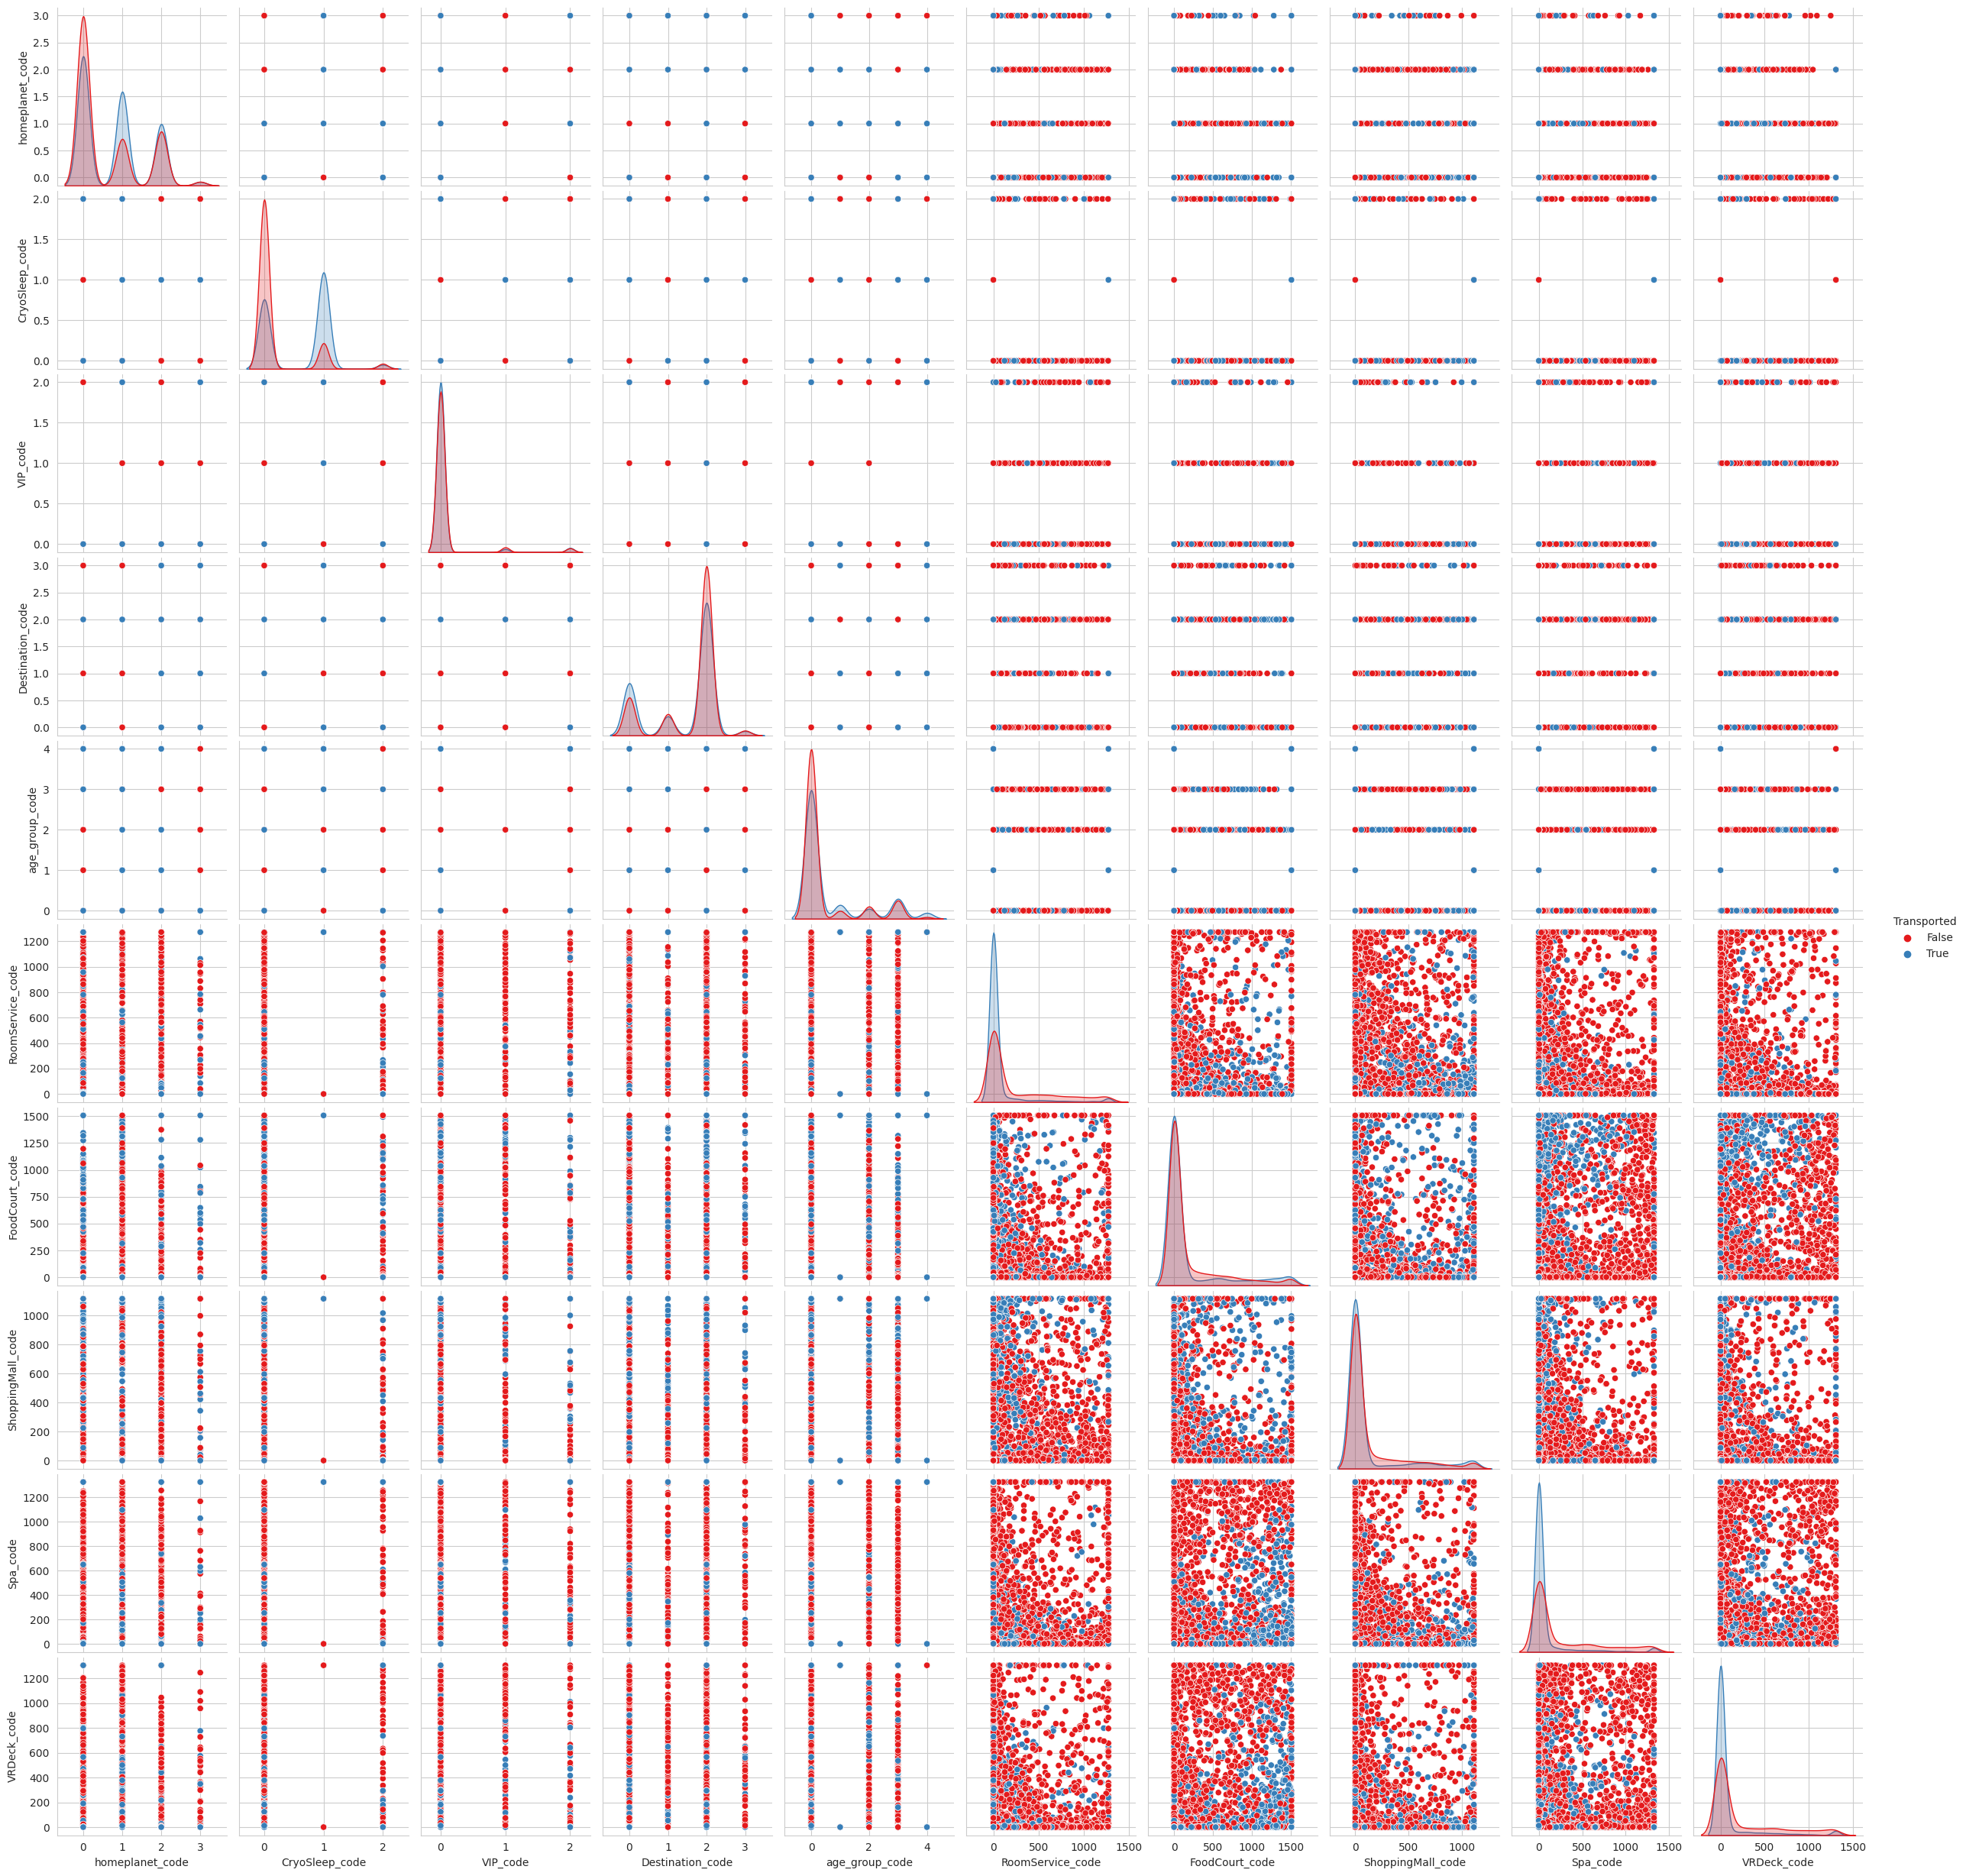

In [37]:
sns.pairplot(train,hue='Transported',palette='Set1')

In [38]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Transported',axis=1), 
                                                    train['Transported'], test_size=0.30, 
                                                    random_state=42)

In [98]:
dtree = DecisionTreeClassifier(random_state=42, max_depth=7)

In [99]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [100]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [101]:
predictions = dtree.predict(X_test)

In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.82      0.72      0.77      1289
        True       0.75      0.85      0.80      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608

